In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
df = pd. read_csv('lista_de_espera_sisu_2022_2.csv', sep='|', encoding='latin-1')

C:\Users\twotc\AppData\Local\Temp\ipykernel_10992\121086234.py:1: DtypeWarning: Columns (22,23,24,25,26,27,28,29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd. read_csv('lista_de_espera_sisu_2022_2.csv', sep='|', encoding='latin-1')


In [109]:
colunas = df.columns
print(colunas)

Index(['ANO', 'EDICAO', 'ETAPA', 'DS_ETAPA', 'CODIGO_IES', 'NOME_IES',
       'SIGLA_IES', 'UF_IES', 'CODIGO_CAMPUS', 'NOME_CAMPUS', 'UF_CAMPUS',
       'MUNICIPIO_CAMPUS', 'CODIGO_CURSO', 'NOME_CURSO', 'GRAU', 'TURNO',
       'DS_PERIODICIDADE', 'TP_COTA', 'TIPO_MOD_CONCORRENCIA',
       'MOD_CONCORRENCIA', 'QT_VAGAS_CONCORRENCIA', 'PERCENTUAL_BONUS',
       'PESO_L', 'PESO_CH', 'PESO_CN', 'PESO_M', 'PESO_R', 'NOTA_MINIMA_L',
       'NOTA_MINIMA_CH', 'NOTA_MINIMA_CN', 'NOTA_MINIMA_M', 'NOTA_MINIMA_R',
       'MEDIA_MINIMA', 'CPF', 'INSCRICAO_ENEM', 'INSCRITO', 'SEXO',
       'DATA_NASCIMENTO', 'UF_CANDIDATO', 'MUNICIPIO_CANDIDATO', 'OPCAO',
       'NOTA_L', 'NOTA_CH', 'NOTA_CN', 'NOTA_M', 'NOTA_R', 'NOTA_L_COM_PESO',
       'NOTA_CH_COM_PESO', 'NOTA_CN_COM_PESO', 'NOTA_M_COM_PESO',
       'NOTA_R_COM_PESO', 'NOTA_CANDIDATO', 'NOTA_CORTE', 'CLASSIFICACAO',
       'APROVADO', 'MATRICULA'],
      dtype='object')


In [110]:
colunas = df.head(10)
print(colunas)

    ANO  EDICAO  ETAPA         DS_ETAPA  CODIGO_IES  \
0  2022       2      7  LISTA DE ESPERA         593   
1  2022       2      7  LISTA DE ESPERA         593   
2  2022       2      7  LISTA DE ESPERA         593   
3  2022       2      7  LISTA DE ESPERA         593   
4  2022       2      7  LISTA DE ESPERA         593   
5  2022       2      7  LISTA DE ESPERA         593   
6  2022       2      7  LISTA DE ESPERA         593   
7  2022       2      7  LISTA DE ESPERA         593   
8  2022       2      7  LISTA DE ESPERA         593   
9  2022       2      7  LISTA DE ESPERA         593   

                                            NOME_IES SIGLA_IES UF_IES  \
0  CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...  CEFET/RJ     RJ   
1  CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...  CEFET/RJ     RJ   
2  CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...  CEFET/RJ     RJ   
3  CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...  CEFET/RJ     RJ   
4  CENTRO FEDERAL DE EDUCAÇÃO

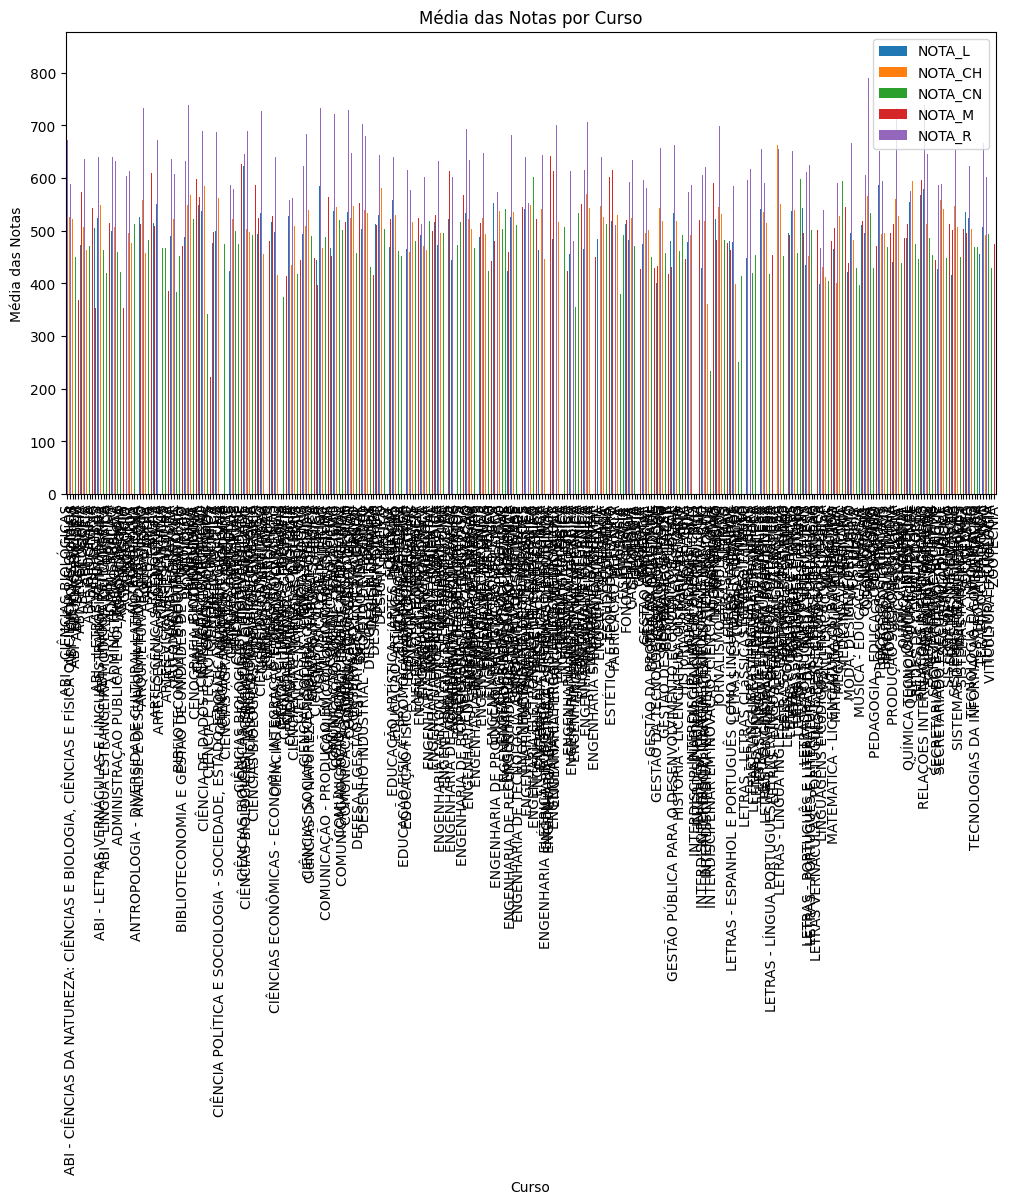

In [111]:
# Selecionando apenas as colunas numéricas de notas
colunas_notas = ['NOTA_L', 'NOTA_CH', 'NOTA_CN', 'NOTA_M', 'NOTA_R']

# Convertendo as colunas para numérico, forçando erro para NaN (caso tenha valores inválidos)
df[colunas_notas] = df[colunas_notas].apply(pd.to_numeric, errors='coerce')

# Agrupando os dados por curso e calculando a média das notas
media_notas_por_curso = df.groupby('NOME_CURSO')[colunas_notas].mean()

# Plotando o gráfico de barras
media_notas_por_curso.plot(kind='bar', figsize=(12, 6))
plt.title('Média das Notas por Curso')
plt.ylabel('Média das Notas')
plt.xlabel('Curso')
plt.xticks(rotation=90)  # Rotaciona os nomes dos cursos para melhor visualização
plt.show()


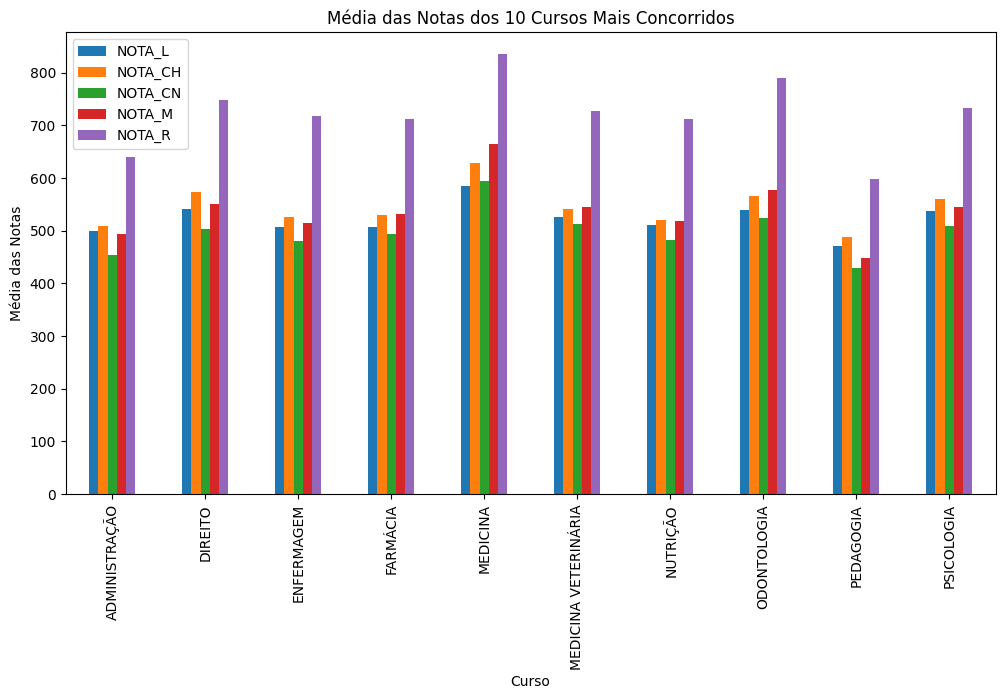

In [112]:
colunas_notas1 = ['NOTA_L', 'NOTA_CH', 'NOTA_CN', 'NOTA_M', 'NOTA_R']

# convertendo os valores e tratando erros
df[colunas_notas1] = df[colunas_notas1].apply(pd.to_numeric, errors='coerce')

candidatos_por_curso1 = df['NOME_CURSO'].value_counts()

# top 10
top_10_cursos1 = candidatos_por_curso1.head(10).index

# consumindo o top 10
df_top_101 = df[df['NOME_CURSO'].isin(top_10_cursos1)]

# mean calcula a media
media_notas_top_101 = df_top_101.groupby('NOME_CURSO')[colunas_notas1].mean()

#gráfico de barras
media_notas_top_101.plot(kind='bar', figsize=(12, 6))
plt.title('Média das Notas dos 10 Cursos Mais Concorridos')
plt.ylabel('Média das Notas')
plt.xlabel('Curso')
plt.xticks(rotation=90)
plt.show()

In [113]:
#renomeando colunas
df = df.rename(columns={
    'SIGLA_IES': 'Universidade',
    'UF_IES': 'Estado',
    'NOME_CAMPUS': 'Campus',
    'NOTA_L': 'Linguagens',
    'NOTA_CH': 'Ciências Humanas',
    'NOTA_CN': 'Ciências da Natureza',
    'NOTA_M': 'Matemática',
    'NOTA_R': 'Redação'
})

NOME_CURSO
MEDICINA                            39061
DIREITO                             10231
ENFERMAGEM                           9179
ADMINISTRAÇÃO                        6828
PSICOLOGIA                           6581
                                    ...  
INTERDISCIPLINAR EM BIOSSISTEMAS        2
ENGENHARIA SANITÁRIA                    1
CIÊNCIAS AGRÁRIAS E DO AMBIENTE         1
ENGENHARIA INDUSTRIAL MADEIREIRA        1
CIÊNCIAS - MATEMÁTICA E FÍSICA          1
Name: count, Length: 331, dtype: int64


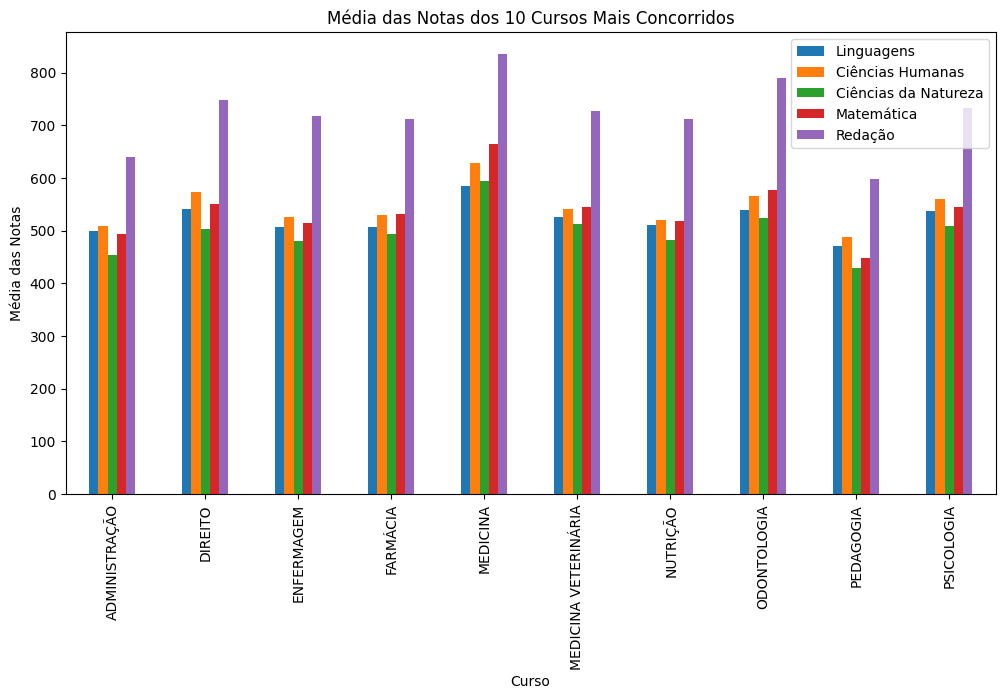

In [114]:
#consumindo com os nomes certos
colunas_notas = ['Linguagens', 'Ciências Humanas', 'Ciências da Natureza', 'Matemática', 'Redação']

#convertendo os valores e tratando erros
df[colunas_notas] = df[colunas_notas].apply(pd.to_numeric, errors='coerce')

#quero o mais concorrido
candidatos_por_curso = df['NOME_CURSO'].value_counts()
print(candidatos_por_curso)

#top 10
top_10_cursos = candidatos_por_curso.head(10).index

#consumindo os que tao no top10
df_top_10 = df[df['NOME_CURSO'].isin(top_10_cursos)]

# mean calcula a media
media_notas_top_10 = df_top_10.groupby('NOME_CURSO')[colunas_notas].mean()

# gráfico de barras
media_notas_top_10.plot(kind='bar', figsize=(12, 6))
plt.title('Média das Notas dos 10 Cursos Mais Concorridos')
plt.ylabel('Média das Notas')
plt.xlabel('Curso')
plt.savefig('media_nota.png')
plt.xticks(rotation=90)
plt.show()
plt.close()


In [115]:
# Agrupar por NOME_CURSO e MOD_CONCORRENCIA e contar o número de candidatos
candidatos_por_curso_e_modalidade = df.groupby(['NOME_CURSO', 'MOD_CONCORRENCIA']).count()

# Exibir o resultado
print(candidatos_por_curso_e_modalidade)

                                                                              ANO  \
NOME_CURSO                MOD_CONCORRENCIA                                          
ABI - CIÊNCIAS BIOLÓGICAS Ampla concorrência                                  248   
                          Candidatos autodeclarados pretos, pardos ou ind...   63   
                          Candidatos autodeclarados pretos, pardos ou ind...  111   
                          Candidatos com renda familiar bruta per capita ...   47   
                          Candidatos que, independentemente da renda (art...   35   
...                                                                           ...   
ZOOTECNIA                 Candidatos com renda familiar bruta per capita ...   98   
                          Candidatos que, independentemente da renda (art...  120   
                          EEP - Egresso da escola pública, de baixa renda:      4   
                          NEEP - Negros, de baixa renda que sejam

In [116]:
df['MOD_CONCORRENCIA'] = df['MOD_CONCORRENCIA'].replace({
    'Ampla concorrência': 'AC',
    'Candidatos autodeclarados pretos, pardos ou indígenas, com renda familiar bruta per capita igual ou inferior a 1,5 salário mínimo e que tenham cursado integralmente o ensino médio em escolas públicas (Lei nº 12.711/2012).': 'PPI + EP + Renda ',
    'Candidatos com renda familiar bruta per capita igual ou inferior a 1,5 salário mínimo que tenham cursado integralmente o ensino médio em escolas públicas (Lei nº 12.711/2012).': 'EP + Renda',
    'Candidatos que, independentemente da renda (art. 14, II, Portaria Normativa nº 18/2012), tenham cursado integralmente o ensino médio em escolas públicas (Lei nº 12.711/2012).': 'EP',
    'Candidatos autodeclarados pretos, pardos ou indígenas que, independentemente da renda (art. 14, II, Portaria Normativa nº 18/2012), tenham cursado integralmente o ensino médio em escolas públicas (Lei nº 12.711/2012).': 'PPI + EP',
    'Candidatos autodeclarados pretos ou pardos, com renda familiar bruta per capita igual ou inferior a 1,5 salário mínimo que tenham cursado integralmente o ensino médio em escolas públicas (Lei nº 12.711/2012).': 'PP + EP + Renda',
    'Candidatos autodeclarados pretos ou pardos que, independentemente da renda (art. 14, II, Portaria Normativa nº 18/2012), tenham cursado integralmente o ensino médio em escolas públicas (Lei nº 12.711/2012).' : 'PP + EP'
})

MOD_CONCORRENCIA
AC                   84707
PPI + EP + Renda     23870
EP + Renda           18114
EP                   16158
PPI + EP             16024
PP + EP + Renda       3504
PP + EP               2253
Name: count, dtype: int64


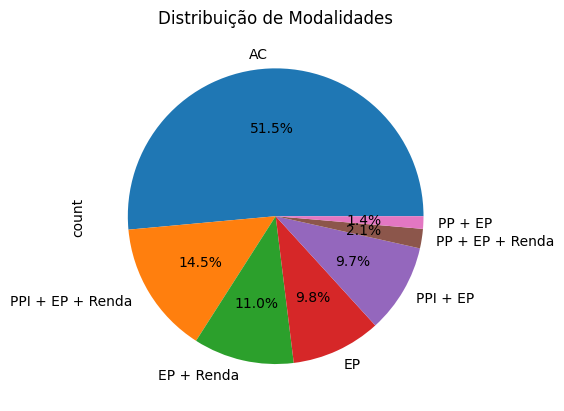

In [117]:
modalidades = df ['MOD_CONCORRENCIA' ].value_counts ()
top_7_modalidades = modalidades.head(7)
df_top_7 = df[df['NOME_CURSO'].isin(top_7_modalidades)]

print(top_7_modalidades)

top_7_modalidades.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Modalidades')
plt.savefig('distribuicao_de_modalidaes.png')
plt.show()
plt.close()


In [118]:
pip install fpdf2

In [144]:
from fpdf import FPDF

pdf = FPDF()

pdf.set_margins(left=15, top=20, right=15)
pdf.set_auto_page_break(auto=True, margin=20) 


pdf.add_page()

In [145]:


pdf.set_font("Arial", "B", size=16)
pdf.cell(0, 10, txt="Guia do SISU - Lista de Espera", ln=True, align='C')
pdf.set_font("Arial", "", size=12)
pdf.ln(10)
pdf.multi_cell(0, 10, txt="Se você está acessando o SISU (Sistema de Seleção Unificada) pela primeira vez, pode estar se perguntando como esse sistema funciona, quais as melhores estratégias para aumentar suas chances e como as notas do ENEM são utilizadas no processo. Este guia tem como objetivo te orientar por cada etapa, esclarecendo as modalidades de concorrência e a importância do sistema de cotas, além de como interpretar as notas de corte dos cursos mais concorridos.", ln=True, align='L')
pdf.ln(10)
pdf.set_font("Arial", "B", size=14)
pdf.multi_cell(0, 10, txt="O que é o SISU?", ln=True, align='L')
pdf.set_font("Arial", "", size=12)
pdf.ln(10)
pdf.multi_cell(0, 10, txt="O SISU é um sistema informatizado do Ministério da Educação (MEC), onde instituições públicas de ensino superior oferecem vagas para candidatos com base nas notas do ENEM (Exame Nacional do Ensino Médio). Por meio do SISU, os candidatos podem concorrer a vagas em universidades públicas de todo o Brasil, sem a necessidade de realizar vestibulares locais.", ln=True, align='L')
pdf.set_font("Arial", "B", size=14)
pdf.multi_cell(0, 10, txt="Modalidades de Concorrência no SISU", ln=True, align='C')
pdf.set_font("Arial", "", size=12)
pdf.ln(10)
pdf.multi_cell(0, 10, txt="Ao se inscrever no SISU, você vai perceber que existem diferentes modalidades de concorrência, e é fundamental entender como cada uma delas funciona para que você faça a escolha mais adequada à sua situação.", ln=True, align='L')
pdf.ln(10)
pdf.set_font("Arial", "B", size=12)
pdf.multi_cell(0, 10, txt="Ampla Concorrência (AC):", ln=True, align='L')
pdf.set_font("Arial", "", size=12)
pdf.multi_cell(0, 10, txt="Nesta modalidade, qualquer candidato pode se inscrever, independentemente de sua situação socioeconômica ou escolar. As vagas são distribuídas apenas com base na nota do ENEM, sem levar em consideração critérios de renda ou se o candidato estudou em escola pública ou particular.", ln=True, align='L')
pdf.ln(10)
pdf.set_font("Arial", "B", size=12)
pdf.multi_cell(0, 10, txt="Escolaridade Pública (EP):", ln=True, align='L')
pdf.set_font("Arial", "", size=12)
pdf.multi_cell(0, 10, txt="O sistema de cotas foi criado para oferecer mais oportunidades para estudantes de escolas públicas, ajudando a reduzir desigualdades históricas no acesso ao ensino superior. Nesta modalidade, uma porcentagem das vagas é reservada para candidatos que estudaram o ensino médio integralmente em escolas públicas.", ln=True, align='L')
pdf.ln(10)
pdf.set_font("Arial", "B", size=12)
pdf.multi_cell(0, 10, txt="Pretos, Pardos e Indigenas (PPI):", ln=True, align='L')
pdf.set_font("Arial", "", size=12)
pdf.multi_cell(0, 10, txt="Além da reserva de vagas para alunos de escolas públicas, há também cotas para estudantes autodeclarados pretos, pardos ou indígenas. Essa modalidade visa promover a inclusão social e corrigir a sub-representação desses grupos nas universidades públicas.", ln=True, align='L')
pdf.ln(10)
pdf.set_font("Arial", "B", size=12)
pdf.multi_cell(0, 10, txt="Outras Modalidades (Renda ou PcD):", ln=True, align='L')
pdf.set_font("Arial", "", size=12)
pdf.multi_cell(0, 10, txt="Dependendo da instituição, podem existir outras modalidades, como vagas específicas para pessoas com deficiência ou com baixa renda familiar. O sistema é bastante flexível para atender a diversos perfis de candidatos, ampliando o acesso ao ensino superior.", ln=True, align='L')
pdf.ln(10)
pdf.image('C:\\Users\\twotc\\OneDrive\\Documentos\\Sou_Kick\\Projeto03\\distribuicao_de_modalidaes.png', x=10, w=180)
pdf.ln(10)
pdf.multi_cell(0, 10, txt="Esse gráfico mostra as modalidades mais comuns no SISU. Como você pode ver, a Ampla Concorrência (AC) e Candidatos autodeclarados pretos, pardos ou indígenas, com renda familiar bruta per capita igual ou inferior a 1,5 salário mínimo e que tenham cursado integralmente o ensino médio em escolas públicas (PPI + EP + Renda) são amplamente utilizadas. O sistema de cotas tem sido uma ferramenta poderosa para democratizar o acesso ao ensino superior no Brasil, garantindo que candidatos de diferentes perfis possam ter acesso às vagas. Por isso, é importante se informar bem e escolher a modalidade correta para aumentar suas chances.", ln=True, align='L')
pdf.ln(10)
pdf.set_font("Arial", "B", size=14)
pdf.multi_cell(0, 10, txt="Entendendo as Notas do ENEM", ln=True, align='C')
pdf.set_font("Arial", "", size=12)
pdf.ln(10)
pdf.multi_cell(0, 10, txt="Para cada curso disponível no SISU, existe uma nota de corte, que é a menor nota entre os candidatos classificados no momento. A nota de corte é ajustada diariamente durante o período de inscrições, o que significa que você pode acompanhar e mudar de curso até o último dia, caso perceba que suas chances em outro curso são melhores.", ln=True, align='L')
pdf.ln(10)
pdf.set_font("Arial", "B", size=12)
pdf.multi_cell(0, 10, txt="As Cinco Competências do ENEM", ln=True, align='L')
pdf.set_font("Arial", "", size=12)
pdf.ln(10)
pdf.multi_cell(0, 10, txt="O ENEM avalia os candidatos em cinco áreas de conhecimento, conhecidas como competências: \n 1. Linguagens, Códigos e suas Tecnologias \n 2. Ciências Humanas e suas Tecnologias \n 3. Ciências da Natureza e suas Tecnologias \n 4. Matemática e suas Tecnologias \n 5. Redação \n Cada curso e universidade pode dar pesos diferentes para cada uma dessas competências, de acordo com o perfil da formação. Por exemplo, um curso de Engenharia pode dar mais peso à Matemática e Ciências da Natureza, enquanto um curso de Direito pode valorizar mais as áreas de Linguagens e Ciências Humanas.", ln=True, align='L')
pdf.ln(10)
pdf.image('C:\\Users\\twotc\\OneDrive\\Documentos\\Sou_Kick\\Projeto03\\media_nota.png', x=10, w=200)
pdf.ln(10)
pdf.multi_cell(0, 10, txt="Neste gráfico, vemos a média das notas nas cinco competências do ENEM para os cursos mais concorridos. Cursos como Medicina, Engenharia e Direito geralmente exigem notas muito altas em todas as áreas, mas com destaque para Matemática e Ciências da Natureza em cursos de exatas, e para Linguagens e Redação em cursos de humanidades. Analisar esses dados é fundamental para entender onde seus pontos fortes estão e como isso pode te ajudar a escolher o curso certo.", ln=True, align='L')
pdf.ln(10)
pdf.set_font("Arial", "B", size=14)
pdf.multi_cell(0, 10, txt="Como Aumentar Suas Chances no SISU?", ln=True, align='C')
pdf.set_font("Arial", "", size=12)
pdf.ln(10)
pdf.multi_cell(0, 10, txt="1. Acompanhe as notas de corte: Durante o período de inscrições, as notas de corte mudam a cada dia. Fique atento e não tenha medo de mudar sua escolha de curso ou universidade se perceber que suas chances estão melhores em outro lugar.", ln=True, align='L')
pdf.multi_cell(0, 10, txt="2. Verifique os pesos das competências: Algumas universidades atribuem pesos diferentes para cada competência do ENEM. Isso pode fazer a diferença dependendo do curso que você escolher.", ln=True, align='L')
pdf.multi_cell(0, 10, txt="3. Escolha sua modalidade de concorrência com cuidado: Não subestime a importância de escolher a modalidade certa para o seu perfil. Se você estudou em escola pública ou se encaixa em alguma das cotas, certifique-se de se inscrever na modalidade correta.", ln=True, align='L')
pdf.ln(10)
pdf.set_font("Arial", "B", size=14)
pdf.multi_cell(0, 10, txt="Conclusão", ln=True, align='C')
pdf.set_font("Arial", "", size=12)
pdf.ln(10)
pdf.multi_cell(0, 10, txt="O SISU pode parecer complexo no início, mas ao entender bem as modalidades de concorrência, as notas de corte e como suas notas no ENEM são distribuídas entre as diferentes competências, você pode tomar decisões mais informadas e estratégicas. O sistema de cotas também oferece oportunidades valiosas para muitos candidatos que, de outra forma, não teriam acesso ao ensino superior.\nBoa sorte na sua inscrição e lembre-se: cada detalhe conta na sua jornada para conquistar uma vaga na universidade!", ln=True, align='L')


C:\Users\twotc\AppData\Local\Temp\ipykernel_10992\2230198160.py:1: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", "B", size=16)
C:\Users\twotc\AppData\Local\Temp\ipykernel_10992\2230198160.py:2: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(0, 10, txt="Guia do SISU - Lista de Espera", ln=True, align='C')
C:\Users\twotc\AppData\Local\Temp\ipykernel_10992\2230198160.py:2: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 10, txt="Guia do SISU - Lista de Espera", ln=True, align='C')
C:\Users\twotc\AppData\Local\Temp\ipykernel_10992\2230198160.py:3: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", "", size=12)
C:\Users\twotc\AppData\Local\Temp\ipykernel_1099

False

In [146]:
# Salvando o arquivo PDF
pdf.output("guia_sisu_lista_espera.pdf")